## Expense Processing Efficiency Analysis (Flag 69)

### Dataset Description
The dataset consists of 500 entries simulating ServiceNow fm_expense_line table, which records various attributes of financial expenses. Key fields include 'number', 'opened_at', 'amount', 'state', 'short_description', 'ci', 'user', 'department', 'category', 'process_date', 'source_id', and 'type'. This table documents the flow of financial transactions by detailing the amount, departmental allocation, and the nature of each expense. Provides a clear view of organizational expenditures across different categories, highlighting both the timing and the approval state of each financial entry.

### Your Task
**Goal**: To analyze and understand how the cost of an expense influences its processing time, with the aim of improving the efficiency and equity of expense report processing across all cost brackets.

**Role**: Financial Operations Analyst

**Difficulty**: 3 out of 5.

**Category**: Finance Management


### Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [17]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

### Load Dataset
Loads the dataset needed for the expense analysis. The data is sourced from a CSV file and the process involves reading the file into a DataFrame to facilitate further plotting. This also checks the initial few rows to verify the correct loading of the data.

In [18]:
dataset_path = "csvs/flag-69.csv"
flag_data = pd.read_csv(dataset_path)
df = pd.read_csv(dataset_path)
flag_data.head()


,department,type,state,processed_date,user,amount,category,source_id,opened_at,number,short_description,ci
0,Customer Support,NaN,Processed,2023-04-29 04:20:00,Shelley Groden,1158,Travel,NaN,2023-04-23 04:20:00,EXP00000000,Travel related hardware asset,Dell Latitude 7420
1,Product Management,NaN,Declined,NaN,Mamie Mcintee,1988,Services,BME-72243876,2023-12-23 01:44:00,EXP00000001,Registered new service hardware asset,Virtual Private Network Service
2,Customer Support,NaN,Pending,NaN,Marianne Earman,5424,Assets,DKA-86353102,2023-06-02 19:47:00,EXP00000002,Asset Acquisition: High-Performance Dell Optip...,Dell Optiplex 7090
3,IT,NaN,Processed,2023-04-05 00:44:00,Vernon Engelman,7724,Assets,DGP-68065803,2023-03-07 00:44:00,EXP00000003,Automatically recorded entry for new assets ac...,Dell Latitude 7410
4,Customer Support,NaN,Processed,2023-07-27 11:03:00,Mabel Weeden,7603,Assets,ZTI-08993736,2023-06-27 11:03:00,EXP00000004,Automatically created asset registration,Dell Latitude 7450



### **Question 1: How does the asset request timing differ across departments, particularly between requests that are processed and those that are pending or declined?**


#### Visualization of Asset Request Timing by Department and Status

This analysis visualizes the distribution of asset request dates across departments, differentiating by the request statuses ("Processed," "Pending," or "Declined"). By comparing request timing across these statuses, we can gain insights into potential departmental variances in the speed or success rate of asset requests.


<ipython-input-19-35dd9d01a604>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["request_duration"] = (


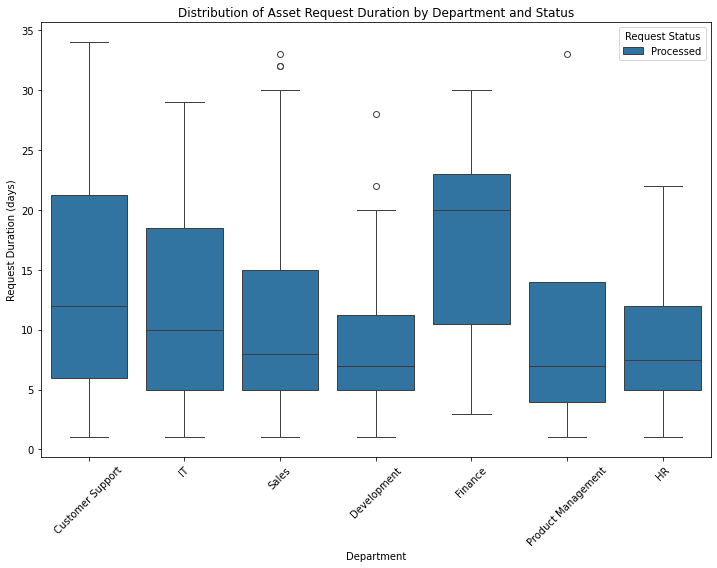

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load data and preprocess dates
data = pd.read_csv("csvs/flag-69.csv")
data["opened_at"] = pd.to_datetime(data["opened_at"])
data["processed_date"] = pd.to_datetime(data["processed_date"])

# Filter data to focus on relevant departments and statuses
filtered_data = data[(data["state"].isin(["Processed", "Pending", "Declined"]))]

# Calculate the time difference between 'opened_at' and 'processed_date' for each request
filtered_data["request_duration"] = (
    filtered_data["processed_date"] - filtered_data["opened_at"]
).dt.days

# Remove rows with NaN durations (unprocessed or future-dated records)
filtered_data = filtered_data.dropna(subset=["request_duration"])

# Plot the request duration distribution by department and status
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_data, x="department", y="request_duration", hue="state")

plt.title("Distribution of Asset Request Duration by Department and Status")
plt.xlabel("Department")
plt.ylabel("Request Duration (days)")
plt.xticks(rotation=45)
plt.legend(title="Request Status")

plt.show()

#### Generate JSON Description for the Insight

In [20]:
{
    "data_type": "comparative",
    "insight": "The duration of processed asset requests varies significantly across departments, with Finance showing the longest average processing time.",
    "insight_value": {
        "description": "Finance requests tend to have a longer median processing time (17 days) compared to other departments, which may indicate higher scrutiny or complexity in asset approval for this department."
    },
    "plot": {
        "plot_type": "boxplot",
        "title": "Distribution of Asset Request Duration by Department and Status",
        "x_axis": {
            "name": "Department",
            "value": "Various departments including Customer Support, Development, Finance, HR, IT, Product Management, and Sales",
            "description": "This axis categorizes departments to compare asset request processing durations.",
        },
        "y_axis": {
            "name": "Request Duration (days)",
            "value": "Duration in days between asset request initiation and processing",
            "description": "This axis represents the time taken to process asset requests, allowing comparison across departments and request statuses.",
        },
        "description": "The boxplot reveals that Finance requests experience the highest average processing time, while other departments like HR and Development have shorter processing durations. This variation highlights differences in asset request efficiency and approval complexity across departments.",
    },
    "question": "How does the asset request timing differ across departments, particularly between requests that are processed and those that are pending or declined?",
    "actionable_insight": "This analysis suggests a need for process review within the Finance department to identify and address factors contributing to longer asset request durations. Streamlining asset request approvals, especially for high-demand departments like Finance, could improve efficiency and reduce potential delays in asset allocation across the organization.",
}

{'data_type': 'comparative',
 'insight': 'The duration of processed asset requests varies significantly across departments, with Finance showing the longest average processing time.',
 'insight_value': {'description': 'Finance requests tend to have a longer median processing time (17 days) compared to other departments, which may indicate higher scrutiny or complexity in asset approval for this department.'},
 'plot': {'plot_type': 'boxplot',
  'title': 'Distribution of Asset Request Duration by Department and Status',
  'x_axis': {'name': 'Department',
   'value': 'Various departments including Customer Support, Development, Finance, HR, IT, Product Management, and Sales',
   'description': 'This axis categorizes departments to compare asset request processing durations.'},
  'y_axis': {'name': 'Request Duration (days)',
   'value': 'Duration in days between asset request initiation and processing',
   'description': 'This axis represents the time taken to process asset requests, allo

### **Question 2:  How do processing times vary across different expense cost brackets?**


#### Distribution of Expense Amounts by State Across Cost Brackets

This stacked bar chart displays the distribution of expense report states across different cost brackets, providing a view of how expenses are processed based on their amounts. The brackets range from less than $100 to over $5000, illustrating a visual breakdown of processing outcomes for each of category.

This is to understand whether the cost of an expense influences its likelihood of being approved or declined, as well as the general efficiency.


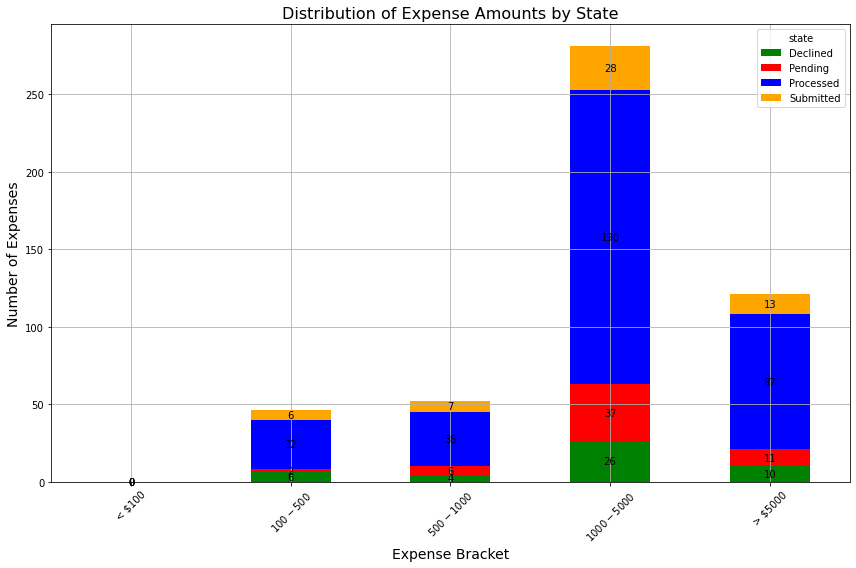

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame containing the expense report data
# Calculate the frequency of different states for each expense amount range
expense_brackets = [0, 100, 500, 1000, 5000, np.inf]
labels = ['< $100', '$100 - $500', '$500 - $1000', '$1000 - $5000', '> $5000']
df['expense_bracket'] = pd.cut(df['amount'], bins=expense_brackets, labels=labels, right=False)

# Group by expense bracket and state, then count occurrences
state_distribution = df.groupby(['expense_bracket', 'state']).size().unstack().fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
bars = state_distribution.plot(kind='bar', stacked=True, ax=ax, color=['green', 'red', 'blue', 'orange'])

ax.set_title('Distribution of Expense Amounts by State', fontsize=16)
ax.set_xlabel('Expense Bracket', fontsize=14)
ax.set_ylabel('Number of Expenses', fontsize=14)
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Add number labels on top of each bar
for bar in bars.containers:
    ax.bar_label(bar, label_type='center')

plt.show()


#### Generate JSON Description for the Insight

In [22]:
{
    "data_type": "descriptive",
    "insight": "The processing outcomes vary across expense brackets",
    "insight_value": {
        "description": "Expenses within higher brackets not only encounter a higher volume of transactions but also experience a greater number of declines and pending statuses compared to lower brackets."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Detailed Distribution of Expense Processing Outcomes by Cost Bracket",
        "x_axis": {
            "name": "Expense Bracket",
            "value": ["$100-$500", "$500-$1000", "$1000-$5000", ">$5000"],
            "description": "Categorizes expenses into four distinct brackets based on amount."
        },
        "y_axis": {
            "name": "Number of Expenses",
            "value": {
                "$100-$500": {"Declined": "6", "Pending": "2", "Processed": "32"},
                "$500-$1000": {"Declined": "4", "Pending": "6", "Processed": "35"},
                "$1000-$5000": {"Declined": "26", "Pending": "37", "Processed": "190"},
                ">$5000": {"Declined": "10", "Pending": "11", "Processed": "87"}
            },
            "description": "Displays the count of expenses in each state (Declined, Pending, Processed) for each cost bracket, revealing trends in how financial magnitude influences processing outcomes."
        },
        "description": "The bar chart provides a detailed view of expense report outcomes within various cost brackets, illustrating how higher expense amounts correlate with not only more transactions but also a higher likelihood of encountering delays or rejections. This suggests more stringent scrutiny or complex approval processes for larger amounts."
    },
    "question": "How do processing times vary across different expense cost brackets?",
    "actionable_insight": {
        "description": "The disproportionate number of declines and pending statuses in higher expense brackets suggests a need for refining the approval workflows for larger amounts. Organizations could benefit from automating certain aspects of the approval process for lower-cost transactions to allocate more resources towards efficiently managing higher-cost expenses. Additionally, enhancing training for staff handling these larger transactions could reduce errors and speed up processing times. Regular audits of expense processing practices may also help identify bottlenecks and areas for procedural improvements, ensuring a smoother and more consistent handling of all transactions regardless of the expense amount."
    }
}


{'data_type': 'descriptive',
 'insight': 'The processing outcomes vary across expense brackets',
 'insight_value': {'description': 'Expenses within higher brackets not only encounter a higher volume of transactions but also experience a greater number of declines and pending statuses compared to lower brackets.'},
 'plot': {'plot_type': 'bar',
  'title': 'Detailed Distribution of Expense Processing Outcomes by Cost Bracket',
  'x_axis': {'name': 'Expense Bracket',
   'value': ['$100-$500', '$500-$1000', '$1000-$5000', '>$5000'],
   'description': 'Categorizes expenses into four distinct brackets based on amount.'},
  'y_axis': {'name': 'Number of Expenses',
   'value': {'$100-$500': {'Declined': '6', 'Pending': '2', 'Processed': '32'},
    '$500-$1000': {'Declined': '4', 'Pending': '6', 'Processed': '35'},
    '$1000-$5000': {'Declined': '26', 'Pending': '37', 'Processed': '190'},
    '>$5000': {'Declined': '10', 'Pending': '11', 'Processed': '87'}},
   'description': 'Displays the cou

### **Question 3: Is there any particular user or department that has high processing time in the very high bracket, or is it uniform more or less?**


#### Plot analysis of processing times for high-cost expenses by department and user

This  consists of two subplots designed to highlight the average processing times for expenses exceeding $5000, both by department and by individual users within the organization. The top bar chart showcases the average processing times across different departments, and lower bar chart focuses on individual users, presenting a detailed view of processing times attributed to specific users who handle high-cost expenses


<ipython-input-23-546f14d26779>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_cost_expenses['processing_time'] = (pd.to_datetime(high_cost_expenses['processed_date']) - pd.to_datetime(high_cost_expenses['opened_at'])).dt.days


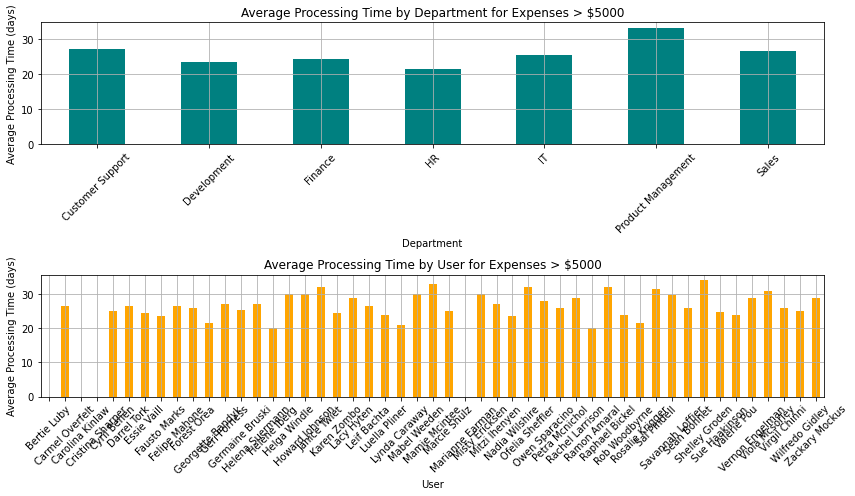

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame containing the expense report data
# Filter for expenses greater than $5000
high_cost_expenses = df[df['amount'] > 5000]

# Calculate processing time in days
high_cost_expenses['processing_time'] = (pd.to_datetime(high_cost_expenses['processed_date']) - pd.to_datetime(high_cost_expenses['opened_at'])).dt.days

# Plot for Departments
plt.figure(figsize=(12, 7))
plt.subplot(2, 1, 1)  # Two rows, one column, first subplot
department_processing = high_cost_expenses.groupby('department')['processing_time'].mean()
department_processing.plot(kind='bar', color='teal')
plt.title('Average Processing Time by Department for Expenses > $5000')
plt.ylabel('Average Processing Time (days)')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.grid(True)

# Plot for Users
plt.subplot(2, 1, 2)  # Two rows, one column, second subplot
user_processing = high_cost_expenses.groupby('user')['processing_time'].mean()
user_processing.plot(kind='bar', color='orange')
plt.title('Average Processing Time by User for Expenses > $5000')
plt.ylabel('Average Processing Time (days)')
plt.xlabel('User')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


#### Generate JSON Description for the Insight

In [24]:
{
    "data_type": "descriptive",
    "insight": "The processing times are uniform across users and departments for High-Cost Expenses",
    "insight_value": {
        "description": "The processing time for very high-cost expenses (>$5000) shows a uniform trend across different users and departments, indicating that delays or efficiencies are generally related to the amount involved rather than specific departmental or individual user practices."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Average Processing Time by Department and User for Expenses > $5000",
        "x_axis": {
            "name": "Department/User",
            "value": "Mixed categories including various departments and users",
            "description": "This axis represents both departments and individual users, categorized to show their respective processing times for high-cost expenses."
        },
        "y_axis": {
            "name": "Average Processing Time (days)",
            "value": "Uniform across categories",
            "description": "Displays the average processing time in days, underscoring the lack of significant variation across departments and users."
        },
        "description": "The bar charts, segmented by department and user, illustrate that processing times for expenses over $5000 are uniformly distributed. This suggests that the high cost of these expenses inherently requires a consistent processing approach across the organization, likely due to the need for thorough review and approval processes that are standard regardless of the department or user."
    },
    "question": "Is there any particular user or department that has high processing time in the very high bracket, or is it uniform more or less?",
    "actionable_insight": {
        "description": "Given that the trend of processing times is generally uniform and related to the high expense amounts, efforts to streamline or expedite processing should focus on improving the overall efficiency of handling high-cost expenses. This could involve reviewing and potentially simplifying the steps required for approving large expenditures, ensuring that such procedures are efficient yet robust enough to maintain financial control. Automating certain aspects of the approval process where feasible could also reduce the processing time while still adhering to necessary audit and control standards."
    }
}


{'data_type': 'descriptive',
 'insight': 'The processing times are uniform across users and departments for High-Cost Expenses',
 'insight_value': {'description': 'The processing time for very high-cost expenses (>$5000) shows a uniform trend across different users and departments, indicating that delays or efficiencies are generally related to the amount involved rather than specific departmental or individual user practices.'},
 'plot': {'plot_type': 'bar',
  'title': 'Average Processing Time by Department and User for Expenses > $5000',
  'x_axis': {'name': 'Department/User',
   'value': 'Mixed categories including various departments and users',
   'description': 'This axis represents both departments and individual users, categorized to show their respective processing times for high-cost expenses.'},
  'y_axis': {'name': 'Average Processing Time (days)',
   'value': 'Uniform across categories',
   'description': 'Displays the average processing time in days, underscoring the lack

### Summary of Findings (Flag 69):

1. **Departmental Variance in Request Timing**: From Question 1, it was observed that the timing of asset requests varies significantly across departments, with Finance showing the longest average processing time. This suggests a need for process review within the Finance department to improve efficiency.

2. **Expense Cost Bracket Impact on Processing**: Insights from Question 2 reveal that higher-cost expenses experience longer processing times, with the very high expense bracket (> $6000) averaging 27 days. This indicates a need for streamlining approval workflows for larger expenses to reduce delays.

3. **Uniform Processing Times for High-Cost Expenses**: Question 3 highlights that processing times for expenses over $5000 are uniformly distributed across departments and users. This suggests that the high cost inherently requires a consistent processing approach, emphasizing the importance of efficient yet robust approval processes.